# Predictive Modeling Overview
Predictive modeling constitutes a mathematical methodology employed to anticipate forthcoming events or outcomes through the analysis of patterns within a provided set of input data. This essential process serves as a cornerstone of predictive analytics, a specialized form of data analytics that leverages both current and historical data to forecast future activities, behaviors, and trends.








In [1]:
import pandas as pd
import numpy as np
import random as rnd


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


# for warnings 
import warnings
warnings.filterwarnings('ignore')

#  Importing PREPROCESSED  Data

In [5]:
data=pd.read_excel('preprocessed_data.xlsx')

In [6]:
data.to_excel('preprocessed_data.xlsx', index=False)  # This will save the DataFrame as an Excel file with the name 'preprocessed_data.xlsx' and without an index column.

In [7]:
data

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,...,4,10,2,2,10,7,0,8,0,3
1,47,1,2,2,5,13,2,14,4,4,...,4,20,2,3,7,7,1,7,0,3
2,40,1,1,1,5,13,1,5,4,4,...,3,20,2,3,18,13,1,12,0,4
3,41,1,0,0,3,8,2,10,4,2,...,2,23,2,2,21,6,12,6,0,3
4,60,1,2,2,5,13,2,16,4,1,...,4,10,1,3,2,2,2,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,27,0,3,0,5,13,1,3,1,4,...,2,6,3,3,6,5,0,4,0,4
1196,37,1,1,2,1,15,2,10,2,4,...,1,4,2,3,1,0,0,0,0,3
1197,50,1,3,1,1,15,2,28,1,4,...,3,20,3,3,20,8,3,8,0,3
1198,34,0,3,2,0,1,2,9,3,4,...,2,9,3,4,8,7,7,7,0,3


# 6. Model Creation

In [8]:
#  creation of independent variable and dependent variable
x=data.drop('PerformanceRating',axis=1)
y=data['PerformanceRating']

In [9]:
# training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [10]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(960, 26)
(240, 26)
(960,)
(240,)


### Standard Scaling Overview:
Standard scaling, often referred to as z-score scaling, is a method employed to standardize data, ensuring it possesses a mean of 0 and a standard deviation of 1. This scaling technique plays a crucial role in normalizing and aligning data to a common scale, facilitating more accurate comparisons and analyses across different features or variables.

In [11]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data and transform it
scaled_data = scaler.fit_transform(data)

# The result will be a NumPy array with scaled values
print(scaled_data)

[[-0.54145787  0.80942721 -0.17945861 ...  1.10025139 -0.41733475
   0.09961771]
 [ 1.10988772  0.80942721 -0.17945861 ...  0.8177735  -0.41733475
   0.09961771]
 [ 0.33925978  0.80942721 -0.94311225 ...  2.23016296 -0.41733475
   2.02770238]
 ...
 [ 1.44015684  0.80942721  0.58419504 ...  1.10025139 -0.41733475
   0.09961771]
 [-0.32127846 -1.23544154  0.58419504 ...  0.8177735  -0.41733475
   0.09961771]
 [-1.42217552 -1.23544154 -0.94311225 ... -1.15957175  2.39615797
  -1.82846697]]


In [12]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

### SMOTE :
To counter the observed skewness in the target variable, we will employ the Synthetic Minority Over-sampling Technique (SMOTE) through the imbalanced-learn (imblearn) Python package. SMOTE is a resampling method that generates synthetic samples for the minority class, effectively mitigating the imbalance and fostering a more balanced representation within the target variable. This approach ensures that the machine learning model is not biased by the disproportionate distribution of target values, enhancing its ability to generalize and make accurate predictions.








In [13]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [14]:
# Smote is always applied on train data(x_train and y_train)
x_smote, y_smote = smote.fit_resample(x_train,y_train)

In [15]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({3: 705, 2: 154, 4: 101})
SMOTE Classes Counter({3: 705, 2: 705, 4: 705})


In [16]:
data['PerformanceRating'].unique()

array([3, 4, 2], dtype=int64)

In [17]:
y_smote.value_counts()

3    705
2    705
4    705
Name: PerformanceRating, dtype: int64

In [18]:
## model creation

### AdaBoost Classifier
AdaBoost, short for Adaptive Boosting, is an ensemble machine learning algorithm that can be used in a wide variety of classification and regression tasks. It is a supervised learning algorithm that is used to classify data by combining multiple weak or base learners.

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [20]:

# Standardize the feature values (optional but recommended for KNN)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

from sklearn.ensemble import AdaBoostClassifier

#instantiating the object
ada_boost= AdaBoostClassifier()
#fitting the model
ada_boost.fit(x_train, y_train)

#predicting
y_test_pred_ada_boost= ada_boost.predict(x_test_scaled)
y_train_p_ada_boost= ada_boost.predict(x_train_scaled)

accuracy_adaboost_test = accuracy_score(y_test, y_test_pred_ada_boost)
accuracy_adaboost_test

0.6791666666666667

In [21]:
accuracy_adaboost_train = accuracy_score(y_train, y_train_p_ada_boost)
accuracy_adaboost_train

0.7489583333333333

In [22]:
print(classification_report(y_test,y_test_pred_ada_boost))

              precision    recall  f1-score   support

           2       0.89      0.82      0.86        40
           3       0.83      0.69      0.75       169
           4       0.22      0.45      0.29        31

    accuracy                           0.68       240
   macro avg       0.65      0.65      0.64       240
weighted avg       0.76      0.68      0.71       240



In [23]:
print(classification_report(y_train, y_train_p_ada_boost))


              precision    recall  f1-score   support

           2       0.85      0.86      0.85       154
           3       0.91      0.73      0.81       705
           4       0.30      0.71      0.42       101

    accuracy                           0.75       960
   macro avg       0.69      0.77      0.70       960
weighted avg       0.84      0.75      0.78       960



### Random Forest method
In this approach, the decision tree, considered a "weak learner" when used in isolation due to its limited predictive performance, becomes a key building block. However, when you gather an ensemble of decision trees and utilize their combined predictive capabilities, you can achieve strong predictive performance—a "strong learner."


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


# Define your Random Forest parameters
n_estimators = 100  # Number of trees in the forest
max_depth = None   # Maximum depth of the tree (None for no limit)
random_state = 42  # Random state for reproducibility

# Initialize the Random Forest Classifier with your parameters
rf_classifier = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)

# Fit the model to the training data
rf_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(x_test)
y_p = rf_classifier.predict(x_train)

# Evaluate the model's accuracy
accuracy_rf_test = accuracy_score(y_test, y_pred)
accuracy_rf_test

0.9208333333333333

In [25]:
accuracy_rf_train = accuracy_score(y_train, y_p)
accuracy_rf_train

1.0

In [26]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           2       0.95      0.90      0.92        40
           3       0.92      0.98      0.95       169
           4       0.91      0.65      0.75        31

    accuracy                           0.92       240
   macro avg       0.92      0.84      0.87       240
weighted avg       0.92      0.92      0.92       240



In [27]:
print(classification_report(y_train, y_p))


              precision    recall  f1-score   support

           2       1.00      1.00      1.00       154
           3       1.00      1.00      1.00       705
           4       1.00      1.00      1.00       101

    accuracy                           1.00       960
   macro avg       1.00      1.00      1.00       960
weighted avg       1.00      1.00      1.00       960



## LogisticRegression
Logistic regression is a data analysis technique that uses mathematics to find the relationships between two data factors. It then uses this relationship to predict the value of one of those factors based on the other.

In [28]:
# Standardize the feature values (optional but recommended for KNN)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score


#instantiating the object
lr= LogisticRegression(multi_class='ovr')
#training the model
lr.fit(x_train, y_train)

#predicting
y_test_pred_lr= lr.predict(x_test_scaled)
y_train_p_lr= lr.predict(x_train_scaled)




lr_f1_test = f1_score(y_test, y_test_pred_lr, average='macro')
lr_f1_train = f1_score(y_train, y_train_p_lr, average='macro')

accuracy_lr_test = accuracy_score(y_test, y_test_pred_lr)
accuracy_lr_test

0.8041666666666667

In [29]:
accuracy_lr_train=accuracy_score(y_train, y_train_p_lr)
accuracy_lr_train

0.83125

In [30]:
print (classification_report(y_test,y_test_pred_lr))

              precision    recall  f1-score   support

           2       0.69      0.55      0.61        40
           3       0.82      0.95      0.88       169
           4       0.79      0.35      0.49        31

    accuracy                           0.80       240
   macro avg       0.77      0.62      0.66       240
weighted avg       0.80      0.80      0.79       240



In [31]:
print (classification_report(y_train, y_train_p_lr))

              precision    recall  f1-score   support

           2       0.68      0.46      0.55       154
           3       0.85      0.95      0.90       705
           4       0.87      0.57      0.69       101

    accuracy                           0.83       960
   macro avg       0.80      0.66      0.71       960
weighted avg       0.82      0.83      0.82       960



## Gradient Boosting Classifier
Gradient Boosting is a functional gradient algorithm that repeatedly selects a function that leads in the direction of a weak hypothesis or negative gradient so that it can minimize a loss function. Gradient boosting classifier combines several weak learning models to produce a powerful predicting model.

In [32]:
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split



# Create and train a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(x_train, y_train)

# Make predictions on the test data
gb_predictions_test = gb_classifier.predict(x_test)
gb_predictions_train = gb_classifier.predict(x_train)

accuracy_gb_predictions_test = accuracy_score(y_test, gb_predictions_test)

accuracy_gb_predictions_test

0.9291666666666667

In [33]:
accuracy_gb_predictions_train = accuracy_score(y_train, gb_predictions_train)

accuracy_gb_predictions_train

0.99375

In [34]:
# Generate a classification report
print(classification_report(y_test, gb_predictions_test))

              precision    recall  f1-score   support

           2       0.88      0.95      0.92        40
           3       0.94      0.96      0.95       169
           4       0.92      0.71      0.80        31

    accuracy                           0.93       240
   macro avg       0.91      0.87      0.89       240
weighted avg       0.93      0.93      0.93       240



In [35]:
# Generate a classification report
print(classification_report(y_train, gb_predictions_train))

              precision    recall  f1-score   support

           2       0.97      0.99      0.98       154
           3       1.00      0.99      1.00       705
           4       1.00      0.99      1.00       101

    accuracy                           0.99       960
   macro avg       0.99      0.99      0.99       960
weighted avg       0.99      0.99      0.99       960



## K-Nearest Neighbors
K Nearest Neighbour is a simple algorithm that stores all the available cases and classifies the new data or case based on a similarity measure. It is mostly used to classifies a data point based on how its neighbours are classified

In [36]:
# Standardize the feature values (optional but recommended for KNN)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier with the number of neighbors (k) you want to use
knn = KNeighborsClassifier(n_neighbors=3)  # Replace 3 with your desired k value

# Fit the KNN model to the training data
knn.fit(x_train, y_train)

# Make predictions on the test data
knn_predict = knn.predict(x_test)
knn_p = knn.predict(x_train)
# Evaluate the model's accuracy
accuracy_knn_test = accuracy_score(y_test, knn_predict)
accuracy_knn_test

0.7416666666666667

In [37]:
accuracy_knn_train = accuracy_score(y_train, knn_p)
accuracy_knn_train

0.846875

In [38]:
# Generate a classification report
report = (classification_report(y_test, knn_predict))

# Print the classification report
print(report)


              precision    recall  f1-score   support

           2       0.56      0.45      0.50        40
           3       0.78      0.93      0.85       169
           4       0.50      0.10      0.16        31

    accuracy                           0.74       240
   macro avg       0.61      0.49      0.50       240
weighted avg       0.71      0.74      0.70       240



In [39]:
print(classification_report(y_train, knn_p))

              precision    recall  f1-score   support

           2       0.70      0.58      0.64       154
           3       0.87      0.94      0.90       705
           4       0.89      0.56      0.69       101

    accuracy                           0.85       960
   macro avg       0.82      0.70      0.74       960
weighted avg       0.84      0.85      0.84       960



## Support Vector Classifier (SVC)
Support Vector Classifier (SVC) is a machine learning algorithm that can be used for various classification tasks, including employee performance analysis. It can help in classifying employees into different performance categories or predicting performance ratings based on certain features or attributes

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have X and y as your features and target variable
# X = data.drop('PerformanceRating', axis=1)
# y = data['PerformanceRating']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)

# Train the SVM classifier on the training data
svm_classifier.fit(x_train, y_train)

# Make predictions on the test data
svm_y_pred = svm_classifier.predict(x_test)
svm_y_p = svm_classifier.predict(x_train)
# Calculate evaluation metrics
accuracy_svm_test = accuracy_score(y_test, svm_y_pred)

accuracy_svm_test

0.8458333333333333

In [41]:
accuracy_svm_train = accuracy_score(y_train, svm_y_p)

accuracy_svm_train

0.8416666666666667

In [42]:
# Calculate evaluation metrics
print(classification_report(y_train,svm_y_p))

              precision    recall  f1-score   support

           2       0.70      0.57      0.63       165
           3       0.87      0.92      0.90       690
           4       0.80      0.74      0.77       105

    accuracy                           0.84       960
   macro avg       0.79      0.74      0.76       960
weighted avg       0.84      0.84      0.84       960



In [43]:

# Calculate evaluation metrics
print(classification_report(y_test,svm_y_pred))

              precision    recall  f1-score   support

           2       0.56      0.52      0.54        29
           3       0.88      0.92      0.90       184
           4       0.90      0.67      0.77        27

    accuracy                           0.85       240
   macro avg       0.78      0.70      0.73       240
weighted avg       0.84      0.85      0.84       240



In [44]:
from sklearn.model_selection import cross_val_score

# Replace these placeholders with your actual model objects
model_rf = RandomForestClassifier()

model_gb =  GradientBoostingClassifier()  # Your Gradient Boosting model
model_adaboost =  AdaBoostClassifier()  # Your AdaBoost model
model_svc = SVC(kernel='linear', C=1.0)# Your Support Vector Machine model
model_lr =LogisticRegression(multi_class='ovr')  # Your Linear Regression model
model_knn = KNeighborsClassifier(n_neighbors=3) # Your K-Nearest Neighbors model

# Calculate accuracy for each model using cross-validation
accuracy_rf = cross_val_score(model_rf, x, y, cv=5, scoring='accuracy').mean()

accuracy_gb = cross_val_score(model_gb, x, y, cv=5, scoring='accuracy').mean()
accuracy_adaboost = cross_val_score(model_adaboost, x, y, cv=5, scoring='accuracy').mean()
accuracy_svc = cross_val_score(model_svc, x, y, cv=5, scoring='accuracy').mean()
accuracy_lr = cross_val_score(model_lr, x, y, cv=5, scoring='accuracy').mean()
accuracy_knn = cross_val_score(model_knn, x, y, cv=5, scoring='accuracy').mean()

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

# Define the models
models = [
    AdaBoostClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    GradientBoostingClassifier(),
    KNeighborsClassifier(n_neighbors=5),
    SVC(kernel='linear', C=1.0),
]

model_names = [
    ' AdaBoostClassifier',
    'RandomForestClassifier',
    'LogisticRegression',
    'GradientBoostingClassifier',
    'KNeighborsClassifier',
    'SVC ',
]

# Create SMOTE object
smote = SMOTE(random_state=42)

acc = []
d = {}

for model in range(len(models)):
    clf = models[model]
    
    # Apply SMOTE to the training data
    x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
    
    clf.fit(x_train_resampled, y_train_resampled)
    test_pred = clf.predict(x_test)
    acc.append(accuracy_score(test_pred, y_test))

d = {'Modelling Algo': model_names, 'accuracy_score': acc}
d

{'Modelling Algo': [' AdaBoostClassifier',
  'RandomForestClassifier',
  'LogisticRegression',
  'GradientBoostingClassifier',
  'KNeighborsClassifier',
  'SVC '],
 'accuracy_score': [0.8541666666666666,
  0.925,
  0.7125,
  0.9041666666666667,
  0.48333333333333334,
  0.7125]}

In [46]:
accuracy_dataframe = pd.DataFrame(d)
accuracy_dataframe

,Modelling Algo,accuracy_score
0,AdaBoostClassifier,0.854167
1,RandomForestClassifier,0.925000
2,LogisticRegression,0.712500
3,GradientBoostingClassifier,0.904167
4,KNeighborsClassifier,0.483333
5,SVC,0.712500


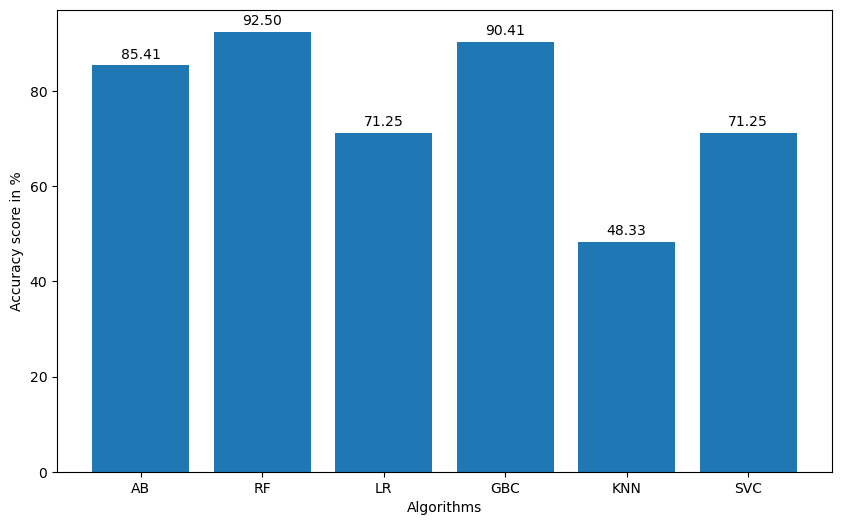

In [48]:
dt_algo={'AB':85.41,'RF':92.50,'LR':71.25,'GBC':90.41, 'KNN':48.33,  'SVC':71.25,  }
algo=list(dt_algo.keys())
score=list(dt_algo.values())

plt.figure(figsize=(10,6))
bars=plt.bar(algo,score)

# Add numerical values to the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords='offset points', ha='center', va='bottom')
    
plt.xlabel('Algorithms')
plt.ylabel('Accuracy score in %')
plt.show()

## The created Trained model using the machine learning algorithm as follows with the accuracy score,
* AdaBoostClassifier = 85.41
* RandomForestClassifier=92.50
* LogisticRegression=71.25
* GradientBoostingClassifier=90.47
* KNeighborsClassifier=48.33
* SVC=71.25